In [55]:
#Task 1

In [56]:
import pandas as pd
import numpy as np

In [57]:
data = pd.read_csv('/Users/gaotianyi/Desktop/coding test/eos.csv')
V = data['Volume (A^3/atom)'].values
E = data['Energy (eV/atom)'].values

In [58]:
V = np.array([17.9358497960000, 18.4963051840000, 19.0683159480000, 19.6520000000000, 20.2474752520000, 20.8548596160000, 21.4742710040000])
E = np.array([-2.59094217375, -2.603891814375, -2.610287264375, -2.6107626125, -2.60594199125, -2.5963438925, -2.58244712])

In [59]:
def energy_volume_equation(V, a, b, c, d):
    return a + b * V**(-2/3) + c * V**(-4/3) + d * V**(-2)

In [60]:
from scipy.optimize import curve_fit

In [61]:
params, _ = curve_fit(energy_volume_equation, V, E, p0 = [E.min(), 1, 1, 1])
#fitting parameters
a, b, c, d = params
print(f"a = {a:.13f}")
print(f"b = {b:.13f}")
print(f"c = {c:.13f}")
print(f"d = {d:.13f}")

a = 2.5127759357659
b = -61.3468543311741
c = 84.3580903235784
d = 660.3355995361577


In [62]:
params, _ = curve_fit(energy_volume_equation, V, E, p0 = [E.min(), 5, 5, 5])
#fitting parameters
a, b, c, d = params
print(f"a = {a:.13f}")
print(f"b = {b:.13f}")
print(f"c = {c:.13f}")
print(f"d = {d:.13f}")

a = 2.5127734027969
b = -61.3467990974659
c = 84.3576892245220
d = 660.3365695401521


In [63]:
params, _ = curve_fit(energy_volume_equation, V, E, p0 = [E.min(), 10, 10, 10])

In [64]:
#fitting parameters
a, b, c, d = params
print(f"a = {a:.13f}")
print(f"b = {b:.13f}")
print(f"c = {c:.13f}")
print(f"d = {d:.13f}")

a = 2.5127739867257
b = -61.3468117909906
c = 84.3577811153304
d = 660.3363480096118


In [65]:
#range
print(f":{V.min():.3f} - {V.max():.3f}A^3/atom")

:17.936 - 21.474A^3/atom


In [66]:
E_fitted = energy_volume_equation(V, a, b, c, d)

In [67]:
min_index = np.argmin(E_fitted)
V0 = V[min_index]
E0_min = E_fitted[min_index]
print(f"Equilibrium volume = {V0:.6f} A^3/atom")

Equilibrium volume = 19.652000 A^3/atom


In [68]:
#Task 2

In [69]:
import matplotlib.pyplot as plt

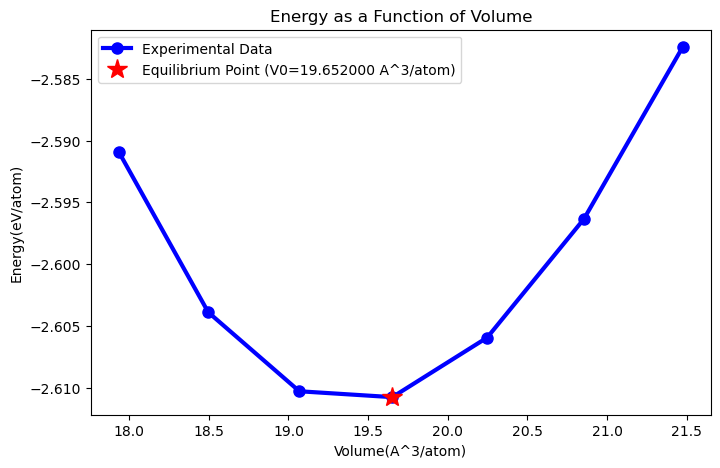

In [70]:
plt.figure(figsize=(8, 5))
plt.plot(V, E, 'bo-', markersize=8, linewidth=3, label='Experimental Data')
E_fitted = energy_volume_equation(V, a, b, c, d)
V0 = V[np.argmin(E_fitted)]
E0 = np.min(E_fitted)
plt.plot(V0, E0, 'r*', markersize=15, label=f'Equilibrium Point (V0={V0:.6f} A^3/atom)')
plt.xlabel('Volume(A^3/atom)')
plt.ylabel('Energy(eV/atom)')
plt.title('Energy as a Function of Volume')
plt.legend();